In [11]:
pip install virtualenv

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [13]:
!pwd

/Users/natalaurina/Downloads/NETOLOGY-pyda-6/МАШИННОЕ ОБУЧЕНИЕ/DS_projects


In [14]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [15]:
!pip install mlens

In [21]:
# %load helpers&EDA/imports_libs.py
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

# Modelling Helpers
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import  Normalizer , scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_validate, cross_val_score
from sklearn.feature_selection import RFECV
from mlens.ensemble import SuperLearner
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import auc, roc_curve, roc_auc_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
#%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6
from pylab import *
s = 1
d = 2
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [22]:
%run helpers&EDA/imports_libs.py

# 1. Понимание бизнеса

## 1.1 Цель
Предсказать качество португальского вина

## 1.2 Описание
Эти два набора данных относятся к красному и белому вариантам португальского вина "Vinho Verde". Из-за проблем конфиденциальности и логистики доступны только физико-химические (входные данные) и сенсорные (выходные данные) переменные (например, нет данных о сортах винограда, марке вина, цене продажи вина и т. д.).

Эти наборы данных можно рассматривать как задачи классификации или регрессии. Классы упорядочены и не сбалансированы (например, нормальных вин гораздо больше, чем отличных или плохих). Алгоритмы обнаружения выбросов могут быть использованы для обнаружения нескольких превосходных или плохих вин.


[Описание от Kaggle](https://www.kaggle.com/rajyellow46/wine-quality)

# 2. Data Understanding

## 2.1 Import Libraries

1-фиксированная кислотность 
2-Летучая кислотность 
3-лимонная кислота 
4-остаточный сахар 
5-хлориды 
6-свободный диоксид серы 
7-общий диоксид серы 
8-Плотность 
9-рН 
10-сульфаты 
11-алкоголь 
Выходная переменная (на основе сенсорных данных): 
12-качество (оценка от 0 до 10 баллов)

## 2.2 Вспомогательные функции

In [2]:
%run helpers&EDA/help_func.py

## 2.3 Загрузка данных

In [3]:
%run helpers&EDA/download_data.py

## 2.4 Статистика и визуализации

In [4]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Описание переменных**

 - fixed acidity: фиксированная кислотность 
 - volatile acidity: Летучая кислотность 
 - citric acid: лимонная кислота 
 - residual sugar: остаточный сахар 
 - chlorides: хлориды 
 - free sulfur dioxide: свободный диоксид серы 
 - total sulfur dioxide: общий диоксид серы 
 - density: Плотность 
 - pH: рН 
 - sulphates: сульфаты 
 - alcohol: алкоголь 


   Переменная, которую надо предсказать (на основе принятых перечисленных  выше данных): 
 - quality: качество (оценка от 0 до 10 баллов)


[Больше информации на сайте Kaggle]((https://www.kaggle.com/rajyellow46/wine-quality))

### 2.4.1 Далее взглянем на некоторую ключевую информацию о переменных
Числовая переменная - это переменная со значениями в области целых или действительных чисел, в то время как категориальная переменная - это переменная, которая может принимать одно из ограниченного и обычно фиксированного числа возможных значений, таких как тип крови.

Обратите особое внимание на тип каждой переменной, количество наблюдений и некоторые значения переменных.



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


### 2.4.2 Тепловая карта корреляции может дать нам понимание того, какие переменные важны

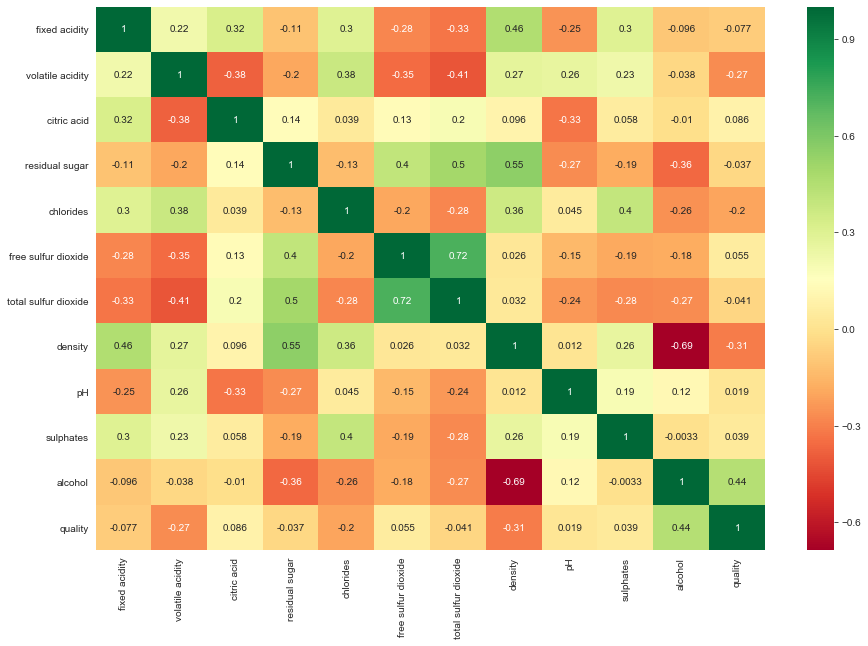

In [7]:
%run helpers&EDA/map.py

### 2.4.3 Давайте подробнее рассмотрим взаимосвязь между процентом алкоголя и качеством вина
Начнем с рассмотрения взаимосвязи между процентом алкоголя и качеством вина.

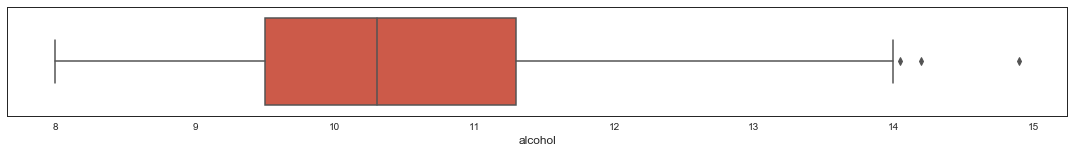

In [8]:
%run helpers&EDA/boxplot.py

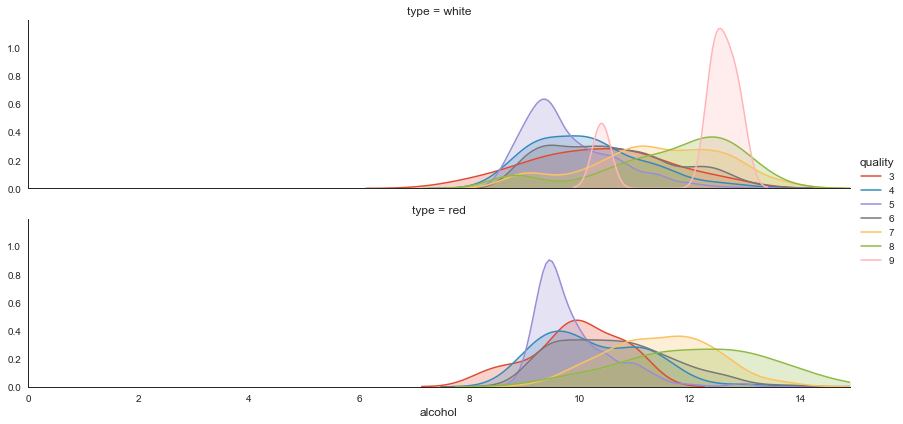

In [9]:
%run helpers&EDA/plot.py

Рассмотрим графики выше. Различия между выживаемостью для разных значений - это то, что будет использоваться для разделения целевой переменной (в данном случае - выживаемости) в модели. Если бы две линии были примерно одинаковыми, то это не было бы хорошей переменной для нашей прогностической модели.

### 2.4.4 Тип вина
Мы также можем посмотреть на категориальную переменную "тип вина" и ее связью с качеством

- white = белое вина  
- red = красное вино


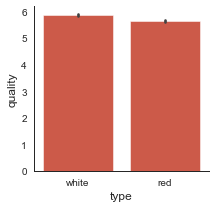

In [10]:
%run helpers&EDA/plot_categ.py